In [18]:
from Investment import Investment

import pandas as pd

import matplotlib.pyplot as plt

In [19]:
# BNB_daily = pd.read_csv('BNB-USDT_daily.csv').drop(['max_value', 'min_value', 'signal', 'signal_diff', 'buyORsell'], axis=1)
# BNB_daily

BTC_daily = pd.read_csv('BTC-USDT_daily.csv')

performance = pd.read_csv('benchmark_performance.csv')
# performance

columns = ["symbol", "month"]
result = pd.DataFrame(columns=columns)
btc = performance[performance["sym.2"] == "BTC"]
btc.drop(['sym', 'returns', 'Unnamed: 2', 'sym.1', 'year', 'returns.1', 'Unnamed: 6', 'sym.2'], axis=1, inplace=True)
btc = btc.reset_index(drop=True)
btc

<ipython-input-19-6fd1c054a2b6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc.drop(['sym', 'returns', 'Unnamed: 2', 'sym.1', 'year', 'returns.1', 'Unnamed: 6', 'sym.2'], axis=1, inplace=True)


,month,returns.2
0,2017.08,0.108744
1,2017.09,-0.066394
2,2017.10,0.476080
3,2017.11,0.522352
4,2017.12,0.394364
...,...,...
76,2023.12,0.120868
77,2024.01,0.007010
78,2024.02,0.435674
79,2024.03,0.166021


In [20]:
strategy = Investment(file_name=BTC_daily, ticker='BTC/USDT')

In [21]:
# strategy.daily_inside_candle_strategy_long_win_loss_ratio(end_date="2024-03-31", loss=0.03, ratio=1)

strategy.daily_inside_candle_strategy_long_reference_loss(end_date="2024-03-31")

# strategy.daily_inside_candle_strategy_long_ema_win_loss_ratio(end_date="2024-03-31", loss=0.03, ratio=1, ema=20)

# strategy.daily_inside_candle_strategy_long_short_win_loss_ratio(end_date="2024-03-31", loss=0.06, ratio=8)

# strategy.daily_inside_candle_strategy_long_ema_reference_loss(end_date="2024-03-31", ema=20)

In [22]:
strategy.stockAccount.get_strategy_info()

{'average_return_per_trade': 3.8821591654498966,
 'accumulated_return': 521.9673667750992,
 'win_ratio': 33.33333333333333,
 'max_win': 89.43039342347849,
 'max_loss': -15.090395916603331,
 'total_trade': 72}

In [23]:
strategy.stockAccount.get_transaction() # transactions

[{'ticker': 'BTC/USDT',
  'date': Timestamp('2017-08-29 00:00:00'),
  'price': 4353.65,
  'ls': True,
  'buy': True},
 {'ticker': 'BTC/USDT',
  'date': Timestamp('2017-09-03 00:00:00'),
  'price': 4508.5,
  'ls': True,
  'buy': False},
 {'ticker': 'BTC/USDT',
  'date': Timestamp('2017-09-19 00:00:00'),
  'price': 4060.0,
  'ls': True,
  'buy': True},
 {'ticker': 'BTC/USDT',
  'date': Timestamp('2017-09-22 00:00:00'),
  'price': 3592.84,
  'ls': True,
  'buy': False},
 {'ticker': 'BTC/USDT',
  'date': Timestamp('2017-09-26 00:00:00'),
  'price': 3928.0,
  'ls': True,
  'buy': True},
 {'ticker': 'BTC/USDT',
  'date': Timestamp('2017-10-19 00:00:00'),
  'price': 5513.0,
  'ls': True,
  'buy': False},
 {'ticker': 'BTC/USDT',
  'date': Timestamp('2017-10-30 00:00:00'),
  'price': 6133.01,
  'ls': True,
  'buy': True},
 {'ticker': 'BTC/USDT',
  'date': Timestamp('2017-11-11 00:00:00'),
  'price': 6503.0,
  'ls': True,
  'buy': False},
 {'ticker': 'BTC/USDT',
  'date': Timestamp('2017-11-26 0

In [24]:
def pls_visualize(pls):

    columns = ['ticker', 'buy_date', 'buy_price', 'sell_date', 'sell_price', 'ls', 'pl', 'pl_percent']
    df = pd.DataFrame(columns=columns)
    for i in pls:
        df.loc[len(df)] = [
            i['ticker'],
            i['buy_date'],
            i['buy_price'],
            i['sell_date'],
            i['sell_price'],
            i['ls'],
            i['pl'],
            i['pl_percent']
        ]

    return df

df_pls = pls_visualize(strategy.stockAccount.get_pls())
df_pls

,ticker,buy_date,buy_price,sell_date,sell_price,ls,pl,pl_percent
0,BTC/USDT,2017-08-29,4353.65,2017-09-03,4508.50,True,154.85,3.556786
1,BTC/USDT,2017-09-19,4060.00,2017-09-22,3592.84,True,-467.16,-11.506404
2,BTC/USDT,2017-09-26,3928.00,2017-10-19,5513.00,True,1585.00,40.351324
3,BTC/USDT,2017-10-30,6133.01,2017-11-11,6503.00,True,369.99,6.032764
4,BTC/USDT,2017-11-26,8700.04,2017-12-21,16480.52,True,7780.48,89.430393
...,...,...,...,...,...,...,...,...
67,BTC/USDT,2023-10-17,28500.77,2023-12-12,41253.41,True,12752.64,44.744896
68,BTC/USDT,2023-12-22,43861.79,2023-12-25,42991.50,True,-870.29,-1.984164
69,BTC/USDT,2024-01-09,46951.04,2024-01-13,42782.74,True,-4168.30,-8.877972
70,BTC/USDT,2024-01-27,41823.51,2024-02-23,51288.42,True,9464.91,22.630597


In [25]:
accumulated_percent = 1
# accumulated_percent *= (i['pl_percent'] / 100) + 1
columns = ["date", "pl_percent"]
result = pd.DataFrame(columns=columns)
for i in range(len(df_pls)):
    accumulated_percent *= (df_pls.iloc[i]['pl_percent']/100) + 1
    row = [df_pls.iloc[i]['buy_date'], (accumulated_percent - 1) * 100]
    result.loc[len(result.index)] = row

result.insert(2, "BTC_return", [None for i in range(len(result))], True)

result

,date,pl_percent,BTC_return
0,2017-08-29,3.556786,None
1,2017-09-19,-8.358876,None
2,2017-09-26,28.619530,None
3,2017-10-30,36.378842,None
4,2017-11-26,158.342978,None
...,...,...,...
67,2023-10-17,457.623005,None
68,2023-12-22,446.558848,None
69,2024-01-09,398.035509,None
70,2024-01-27,510.743917,None


In [26]:
# btc['month'] = pd.to_datetime(btc['month'], format="%Y.%m")

btc['month'] = btc['month'].astype(str)

for i in range(len(btc)):
    if btc.iloc[i]['month'].endswith(".1"):
        btc.at[i, 'month'] = btc.iloc[i]['month'] + "0"
        
btc['month'] = pd.to_datetime(btc['month'], format="%Y.%m")

btc


,month,returns.2
0,2017-08-01,0.108744
1,2017-09-01,-0.066394
2,2017-10-01,0.476080
3,2017-11-01,0.522352
4,2017-12-01,0.394364
...,...,...
76,2023-12-01,0.120868
77,2024-01-01,0.007010
78,2024-02-01,0.435674
79,2024-03-01,0.166021


In [27]:
accumulated_percent = 1

for i in range(len(btc)):
    accumulated_percent *= (btc.iloc[i]['returns.2']/100) + 1
    # row = [df_pls.iloc[i]['buy_date'], (accumulated_percent - 1) * 100]
    btc.at[btc.index[i], 'returns.2'] = (accumulated_percent - 1) * 100
    # result.loc[len(result.index)] = row

btc


,month,returns.2
0,2017-08-01,0.108744
1,2017-09-01,0.042278
2,2017-10-01,0.518559
3,2017-11-01,1.043619
4,2017-12-01,1.442099
...,...,...
76,2023-12-01,4.167069
77,2024-01-01,4.174371
78,2024-02-01,4.628231
79,2024-03-01,4.801936


In [28]:
for i in range(len(result)):
    for j in range(len(btc)):
        # datetime.datetime.strptime()
        if result.iloc[i]['date'].year == btc.iloc[j]['month'].year and result.iloc[i]['date'].month == btc.iloc[j]['month'].month:
            result.at[result.index[i], 'BTC_return'] = btc.iloc[j]['returns.2'] * 100
            break
result   
    

,date,pl_percent,BTC_return
0,2017-08-29,3.556786,10.874391
1,2017-09-19,-8.358876,4.227783
2,2017-09-26,28.619530,4.227783
3,2017-10-30,36.378842,51.855876
4,2017-11-26,158.342978,104.361931
...,...,...,...
67,2023-10-17,457.623005,394.876456
68,2023-12-22,446.558848,416.706852
69,2024-01-09,398.035509,417.437093
70,2024-01-27,510.743917,417.437093


([<matplotlib.axis.XTick at 0x7fbb590a7790>,
 [Text(17532.0, 0, '2018-01-01'),
  Text(17897.0, 0, '2019-01-01'),
  Text(18262.0, 0, '2020-01-01'),
  Text(18628.0, 0, '2021-01-01'),
  Text(18993.0, 0, '2022-01-01'),
  Text(19358.0, 0, '2023-01-01'),
  Text(19723.0, 0, '2024-01-01')])

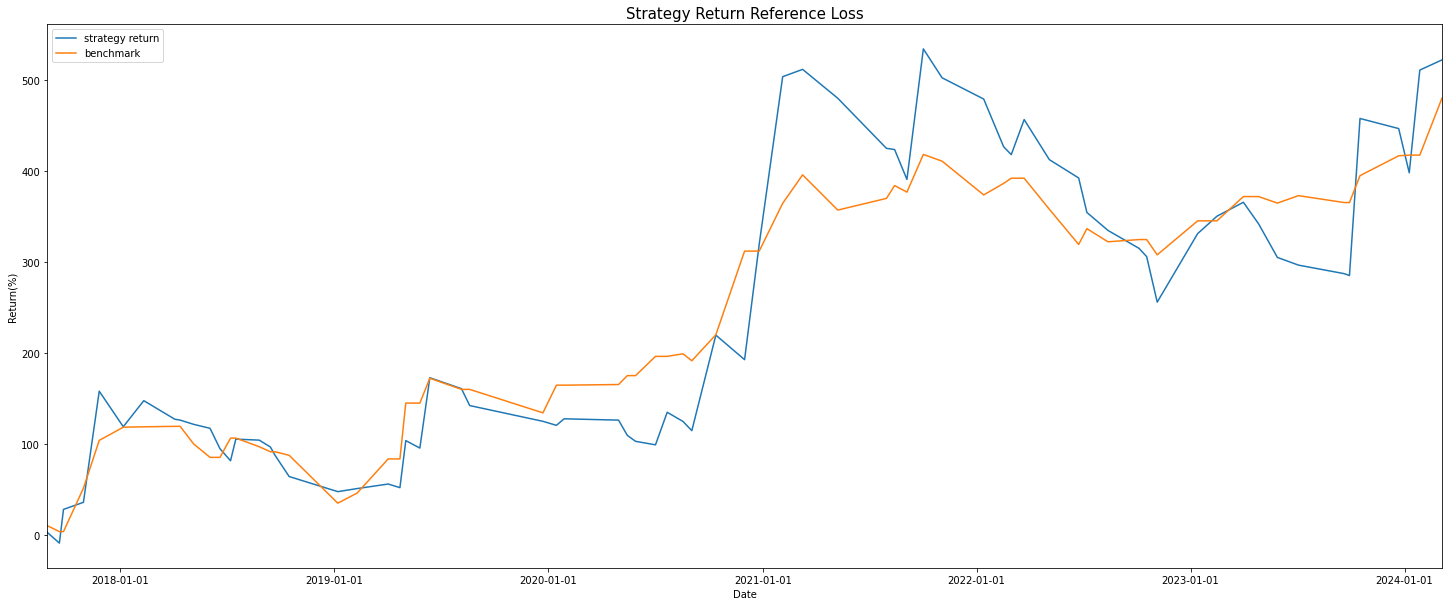

In [29]:
fig = plt.subplots(figsize=(25, 10))

plt.title('Strategy Return Reference Loss', fontsize=15)

plt.xlabel('Date', fontsize=10)
plt.ylabel('Return(%)', fontsize=10)

plt.plot(result['date'], result['pl_percent'], label="strategy return")
# plt.plot(result.index, result['pl_percent'], label="strategy return")
plt.plot(result['date'], result['BTC_return'], label="benchmark")
plt.legend()

plt.xlim(result['date'].min(), result['date'].max())
# plt.xlim(result.index.min(), result.index.max())
ticks = ['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01']
plt.xticks(ticks)

In [30]:
# df_pls.tail(50)
df_pls.head(50)

,ticker,buy_date,buy_price,sell_date,sell_price,ls,pl,pl_percent
0,BTC/USDT,2017-08-29,4353.65,2017-09-03,4508.50,True,154.85,3.556786
1,BTC/USDT,2017-09-19,4060.00,2017-09-22,3592.84,True,-467.16,-11.506404
2,BTC/USDT,2017-09-26,3928.00,2017-10-19,5513.00,True,1585.00,40.351324
3,BTC/USDT,2017-10-30,6133.01,2017-11-11,6503.00,True,369.99,6.032764
4,BTC/USDT,2017-11-26,8700.04,2017-12-21,16480.52,True,7780.48,89.430393
5,BTC/USDT,2018-01-06,16960.39,2018-01-10,14401.00,True,-2559.39,-15.090396
6,BTC/USDT,2018-02-10,8683.93,2018-02-23,9815.55,True,1131.62,13.031197
7,BTC/USDT,2018-04-04,7405.21,2018-04-05,6796.10,True,-609.11,-8.225425
8,BTC/USDT,2018-04-13,7922.99,2018-04-18,7890.96,True,-32.03,-0.404267
9,BTC/USDT,2018-05-06,9863.99,2018-05-07,9661.02,True,-202.97,-2.057687


In [31]:
x = strategy.file_name
# x.head(50)
x = x.loc['2017-10-02': '2024-03-11']
x.tail(50)

,open,high,low,close,volume,max_value,min_value,signal,signal_diff,buyORsell
date,,,,,,,,,,
2024-01-22,41580.32,41689.65,39431.58,39568.02,55426.199110,41689.65,39431.58,0,-3,-1
2024-01-23,39568.02,40176.74,38555.00,39897.60,57956.633510,41689.65,39431.58,1,1,0
2024-01-24,39897.59,40555.00,39484.19,40084.88,39293.828610,41689.65,39431.58,2,1,0
2024-01-25,40084.89,40300.24,39550.00,39961.09,31022.118530,41689.65,39431.58,3,1,0
2024-01-26,39961.09,42246.82,39822.52,41823.51,47384.967260,42246.82,39822.52,0,-3,1
2024-01-27,41823.51,42200.00,41394.34,42120.63,16224.416670,42246.82,39822.52,1,1,0
2024-01-28,42120.63,42842.68,41620.81,42031.06,27294.998380,42246.82,39822.52,2,1,0
2024-01-29,42031.05,43333.00,41804.88,43302.70,31542.742070,43333.0,41804.88,0,-2,0
2024-01-30,43302.71,43882.36,42683.99,42941.10,37619.245460,43333.0,41804.88,1,1,0


In [32]:
x = x[x['buyORsell']==1]
x

,open,high,low,close,volume,max_value,min_value,signal,signal_diff,buyORsell
date,,,,,,,,,,
2017-10-07,4369.00,4479.50,4312.56,4423.00,297.597500,4479.5,4312.56,0,-6,1
2017-10-29,5709.98,6189.88,5648.01,6169.98,1804.778173,6189.88,5648.01,0,-4,1
2017-11-25,8138.99,8734.78,8090.00,8700.01,4292.623682,8734.78,8090.0,0,-4,1
2017-12-15,16334.98,17991.00,16298.45,17539.83,9181.273947,17991.0,16298.45,0,-7,1
2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125,17176.24,14600.0,0,-13,1
...,...,...,...,...,...,...,...,...,...,...
2024-01-08,43929.01,47248.99,43175.00,46951.04,72814.575890,47248.99,43175.0,0,-4,1
2024-01-26,39961.09,42246.82,39822.52,41823.51,47384.967260,42246.82,39822.52,0,-3,1
2024-02-07,43098.96,44396.50,42788.00,44349.60,34392.599150,44396.5,42788.0,0,-8,1


In [33]:
len(x)

100

In [34]:
# win = 0
# loss = 0
# for i in strategy.stockAccount.get_pls():
#     if i['pl_percent'] > 0:
#         win += 1
#     else:
#         loss += 1

# print(win)
# print(loss)
# print((win / loss) * 100)

- Stoploss
    - +3% -3%
    - 2:1, 3:1...
    - reference loss
- Entry
    - non-technical
    - technical
        - EMA/SMA
- Daily/4-Hourly/Hourly
- Long + short (future)